In [1]:
import os
from dotenv import load_dotenv
from pathlib import Path

# Get the project root directory (sciborg root)
current_dir = Path.cwd()
project_root = current_dir

# Look for sciborg root by going up until we find .env or sciborg directory
while project_root != project_root.parent:
    if (project_root / '.env').exists() or project_root.name == 'sciborg':
        break
    project_root = project_root.parent
    if project_root == project_root.parent:  # Reached filesystem root
        # Fallback: assume we're in notebooks/testing, go up two levels
        project_root = Path.cwd()
        if 'notebooks' in str(project_root):
            project_root = project_root.parent.parent
        break

# Load .env file from project root
env_path = project_root / '.env'
if env_path.exists():
    load_dotenv(dotenv_path=str(env_path))
    print(f"Loaded .env from: {env_path}")
else:
    # Try loading from current directory as fallback
    load_dotenv()
    print("Warning: .env not found in project root, trying current directory")

# Get API keys from environment
openai_key = os.getenv("OPENAI_API_KEY")
if openai_key:
    os.environ["OPENAI_API_KEY"] = openai_key
else:
    print("Warning: OPENAI_API_KEY not found in environment variables")



In [2]:
import os
import sys

sys.path.insert(0, str(project_root)) 

from langchain_openai import ChatOpenAI
from sciborg.ai.agents.core import create_sciborg_chat_agent
from sciborg.ai.chains.microservice import module_to_microservice
from sciborg.ai.chains.workflow import create_workflow_planner_chain, create_workflow_constructor_chain

from sciborg.utils.drivers import MicrowaveSynthesizer, MicrowaveSynthesizerObject, PubChemCaller
from sciborg.core.library.base import BaseDriverMicroservice


In [3]:
file_path = str(project_root / 'ai/agents/driver_pubchem.json')

pubchem_command_microservice = module_to_microservice(PubChemCaller)
print(pubchem_command_microservice)

with open(file_path, 'w') as outfile:
    outfile.write(pubchem_command_microservice.model_dump_json(indent=2))


Processing functions:   0%|          | 0/8 [00:00<?, ?function/s]

Processing functions:  12%|█▎        | 1/8 [00:02<00:18,  2.71s/function]

{'name': 'get_assay_description_from_AID', 'microservice': 'PubChemCaller', 'desc': 'Function purpose', 'uuid': '00ca9ce1-5316-46cd-9346-523dd0e9415c', 'parameters': {'aid': {'name': 'aid', 'data_type': 'str', 'is_optional': False, 'is_list': False, 'desc': 'string representation of a list of assay IDs'}}, 'has_return': True, 'return_signature': {'dict': 'a dictionary of description, protocol and comment for the given assay ID'}}
<class 'dict'>


Processing functions:  25%|██▌       | 2/8 [00:04<00:12,  2.13s/function]

{'name': 'get_assay_name_from_aid', 'microservice': 'PubChemCaller', 'desc': 'Function purpose\nGives a dictionary of names for each assay ID (aid)', 'uuid': '00ca9ce1-5316-46cd-9346-523dd0e9415c', 'parameters': {'aid': {'name': 'aid', 'data_type': 'str', 'desc': 'string representation of a list of assay IDs', 'is_optional': False, 'is_list': False, 'from_var': False}}, 'has_return': True, 'return_signature': {'str': 'a dictionary of names for each assay ID'}}
<class 'dict'>


Processing functions:  38%|███▊      | 3/8 [00:06<00:11,  2.32s/function]

{'name': 'get_assay_results_for_compund', 'microservice': 'PubChemCaller', 'desc': 'Function purpose\nGets all the assay results for a provided compund with an optional filter of assay activity type.', 'uuid': '00ca9ce1-5316-46cd-9346-523dd0e9415c', 'parameters': {'cid': {'name': 'cid', 'data_type': 'str', 'desc': 'a single cid representing a compound', 'is_optional': False}, 'activity_name': {'name': 'activity_name', 'data_type': 'str', 'desc': 'the specific activity type to filter on for example Ki, Kd, IC50, etc', 'is_optional': True}}, 'has_return': True, 'return_signature': {'dict': 'a disctionary representation of the assay result table'}}
<class 'dict'>


Processing functions:  50%|█████     | 4/8 [00:08<00:08,  2.04s/function]

{'name': 'get_cid_from_name', 'microservice': 'PubChemCaller', 'desc': 'Function purpose', 'uuid': '00ca9ce1-5316-46cd-9346-523dd0e9415c', 'parameters': {'inp': {'name': 'inp', 'data_type': 'str', 'is_optional': False, 'is_list': False, 'desc': 'string representation of a chemical name'}}, 'has_return': True, 'return_signature': {'dict': 'a dictionary of cids for the given chemical name'}}
<class 'dict'>


Processing functions:  62%|██████▎   | 5/8 [00:13<00:09,  3.09s/function]

{'name': 'get_compound_property_table', 'microservice': 'PubChemCaller', 'desc': 'A short description of the command', 'uuid': '00ca9ce1-5316-46cd-9346-523dd0e9415c', 'parameters': {'inp': {'name': 'inp', 'data_type': 'str', 'is_optional': False, 'is_list': False, 'desc': ''}, 'inp_format': {'name': 'inp_format', 'data_type': 'str', 'is_optional': False, 'is_list': False, 'desc': ''}, 'inp_type': {'name': 'inp_type', 'data_type': 'str', 'is_optional': False, 'is_list': False, 'desc': ''}, 'property_list': {'name': 'property_list', 'data_type': 'str', 'is_optional': False, 'is_list': False, 'desc': ''}}, 'has_return': True, 'return_signature': {'Dict[str, str | int]': 'A return signature in JSON format of the command\n        Key - name of the return variable\n        Value - description of the return variable'}}
<class 'dict'>


Processing functions:  75%|███████▌  | 6/8 [00:17<00:06,  3.29s/function]

{'name': 'get_description', 'microservice': 'PubChemCaller', 'desc': 'Function purpose Get description of a substance or a compound, for assay description, use get_assay_description() instead', 'uuid': '00ca9ce1-5316-46cd-9346-523dd0e9415c', 'parameters': {'inp': {'name': 'inp', 'data_type': 'str', 'desc': 'string representation of an single chemical name only', 'is_optional': False, 'is_list': False, 'from_var': False}, 'inp_format': {'name': 'inp_format', 'data_type': 'str', 'desc': 'string of either of name, sid, cid, smiles', 'is_optional': False, 'is_list': False, 'from_var': False}, 'inp_type': {'name': 'inp_type', 'data_type': 'str', 'desc': "'compound' if inp_format is cid, name or smiles of compound or 'substance' if inp_format is sid, name, smiles of substance", 'is_optional': False, 'is_list': False, 'from_var': False}}, 'has_return': True, 'return_signature': {'dict': 'a dictionary of descriptions for each identifier'}}
<class 'dict'>


Processing functions:  88%|████████▊ | 7/8 [00:18<00:02,  2.79s/function]

{'name': 'get_smiles_from_name', 'microservice': 'PubChemCaller', 'desc': 'Function purpose Get SMILES for a given chemical name.', 'uuid': '00ca9ce1-5316-46cd-9346-523dd0e9415c', 'parameters': {'inp': {'name': 'inp', 'data_type': 'str', 'is_optional': False, 'is_list': False, 'desc': 'string representation of a chemical name'}}, 'has_return': True, 'return_signature': {'str': 'a text representing the SMILES for the given chemical name'}}
<class 'dict'>


Processing functions: 100%|██████████| 8/8 [00:21<00:00,  2.74s/function]

{'name': 'get_synonym', 'microservice': 'PubChemCaller', 'desc': 'Function purpose Get Synonym of a substance or compound.', 'uuid': '00ca9ce1-5316-46cd-9346-523dd0e9415c', 'parameters': {'inp': {'name': 'inp', 'data_type': 'str', 'desc': 'string representation of a list of identifiers', 'is_optional': False, 'is_list': False, 'from_var': False}, 'inp_format': {'name': 'inp_format', 'data_type': 'str', 'desc': 'string which can be either of name, sid, cid, smiles', 'is_optional': False, 'is_list': False, 'from_var': False}, 'inp_type': {'name': 'inp_type', 'data_type': 'str', 'desc': "'compound' if inp_format is cid, name or smiles of compound or 'substance' if inp_format is sid, name, smiles of substance", 'is_optional': False, 'is_list': False, 'from_var': False}}, 'has_return': True, 'return_signature': {'dict': 'a dictionary of synonyms for each identifier'}}
<class 'dict'>
name='PubChemCaller' uuid=UUID('00ca9ce1-5316-46cd-9346-523dd0e9415c') desc='This is the Module for Pubchem A

In [4]:
pubchem_driver_based_agent = create_sciborg_chat_agent(
    microservice=pubchem_command_microservice,
    llm=ChatOpenAI(model='gpt-4o'),
    human_interaction=True,
    return_intermediate_steps=True,
    verbose=True
)

In [5]:
result = pubchem_driver_based_agent.invoke({"input":"What is the molecular weight of water?"})



> Entering new AgentExecutor chain...
```
{
    "action": "get_compound_property_table",
    "action_input": {
        "inp": "water",
        "inp_format": "name",
        "inp_type": "compound",
        "property_list": "MolecularWeight"
    }
}
```MolecularWeight
{'PropertyTable': {'Properties': [{'CID': 962, 'MolecularWeight': '18.015'}]}}```
{
    "action": "Final Answer",
    "action_input": "The molecular weight of water is 18.015 g/mol, as retrieved from PubChem."
}
```

> Finished chain.


In [6]:
print(f"Total steps: {len(result['intermediate_steps'])}")
print(f"The Execution flow is as follows:")
print("-"*50)
print("START")
print("-"*50)
for step in result["intermediate_steps"]:
    print("Agent Action:", step[0].tool)
    print("Input:", step[0].tool_input)
    print("Output:", step[1])
    print("\n" + "-"*50)
print("END")

Total steps: 1
The Execution flow is as follows:
--------------------------------------------------
START
--------------------------------------------------
Agent Action: get_compound_property_table
Input: {'inp': 'water', 'inp_format': 'name', 'inp_type': 'compound', 'property_list': 'MolecularWeight'}
Output: {'PropertyTable': {'Properties': [{'CID': 962, 'MolecularWeight': '18.015'}]}}

--------------------------------------------------
END


In [7]:
result['intermediate_steps']

[(AgentAction(tool='get_compound_property_table', tool_input={'inp': 'water', 'inp_format': 'name', 'inp_type': 'compound', 'property_list': 'MolecularWeight'}, log='```\n{\n    "action": "get_compound_property_table",\n    "action_input": {\n        "inp": "water",\n        "inp_format": "name",\n        "inp_type": "compound",\n        "property_list": "MolecularWeight"\n    }\n}\n```'),
  "{'PropertyTable': {'Properties': [{'CID': 962, 'MolecularWeight': '18.015'}]}}")]

In [8]:
result = pubchem_driver_based_agent.invoke({"input":"What is the Ki of pzm21 to the Mu opioid receptor, cite a specific assay in your response? Also provide the modlecular weight of pzm21."})



> Entering new AgentExecutor chain...
To answer your question, I need to perform a few steps:

1. Retrieve the compound ID (CID) for PZM21.
2. Use the CID to get assay results related to the Mu opioid receptor, specifically looking for Ki values.
3. Retrieve the molecular weight of PZM21.

Let's start with the first step: retrieving the CID for PZM21.

Action:
```json
{
    "action": "get_cid_from_name",
    "action_input": {
        "inp": "PZM21"
    }
}
```{'response': {'', '121596705', '124186394'}}```json
{
    "action": "get_assay_results_for_compund",
    "action_input": {
        "cid": "121596705",
        "activity_name": "Ki"
    }
}
```{'AID': {1: '1573390', 5: '1609954', 17: '1806958', 18: '1806958', 19: '1806958', 20: '1806958'}, 'Panel Member ID': {1: '', 5: '', 17: '', 18: '', 19: '', 20: ''}, 'SID': {1: '440143506', 5: '440143506', 17: '440726618', 18: '440726618', 19: '440726618', 20: '440726618'}, 'CID': {1: '121596705', 5: '121596705', 17: '121596705', 18: '121596

In [66]:
print(f"Total steps: {len(result['intermediate_steps'])}")
print(f"The Execution flow is as follows:")
print("-"*50)
print("START")
print("-"*50)
for step in result["intermediate_steps"]:
    print("Agent Action:", step[0].tool)
    print("Input:", step[0].tool_input)
    print("Output:", step[1])
    print("\n" + "-"*50)
print("END")

Total steps: 3
The Execution flow is as follows:
--------------------------------------------------
START
--------------------------------------------------
Agent Action: get_cid_from_name
Input: {'inp': 'pzm21'}
Output: {'response': {'121596705', '', '124186394'}}

--------------------------------------------------
Agent Action: get_assay_results_for_compund
Input: {'cid': '121596705', 'activity_name': 'Ki'}
Output: {'AID': {1: '1573390', 5: '1609954', 17: '1806958', 18: '1806958', 19: '1806958', 20: '1806958'}, 'Panel Member ID': {1: '', 5: '', 17: '', 18: '', 19: '', 20: ''}, 'SID': {1: '440143506', 5: '440143506', 17: '440726618', 18: '440726618', 19: '440726618', 20: '440726618'}, 'CID': {1: '121596705', 5: '121596705', 17: '121596705', 18: '121596705', 19: '121596705', 20: '121596705'}, 'Activity Outcome': {1: 'Active', 5: 'Active', 17: 'Active', 18: 'Active', 19: 'Active', 20: 'Active'}, 'Target GI': {1: '2851402', 5: '2851402', 17: '2851402', 18: '116242691', 19: '116242691', 2

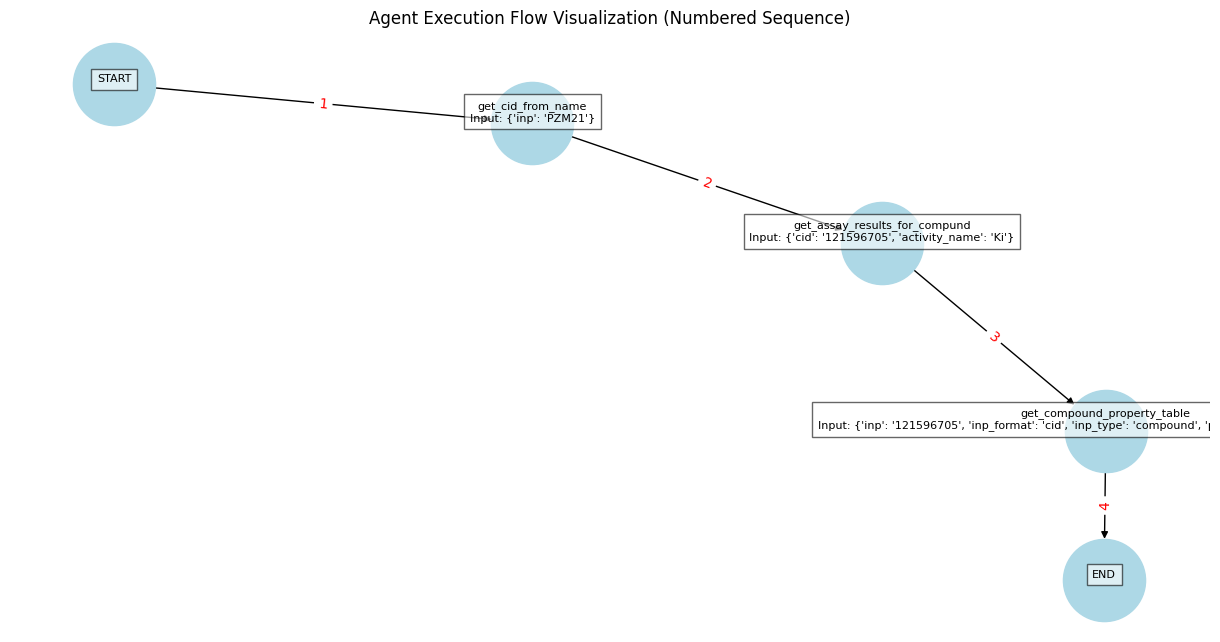

In [9]:
#testing the new visualization package
from sciborg.utils.viz.state_diagram import visualize_execution_flow

visualize_execution_flow(result['intermediate_steps'])

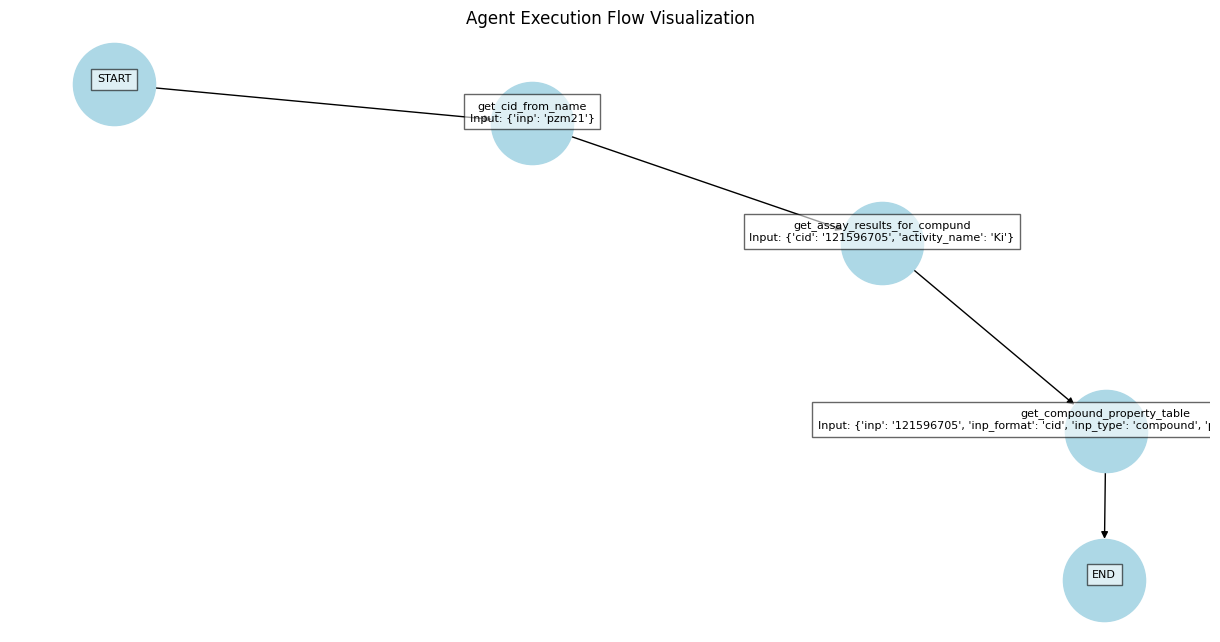

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add start and end nodes
G.add_node("START")
G.add_node("END")

# Process intermediate steps and add nodes/edges
previous_node = "START"
node_labels = {"START": "START", "END": "END"}  # Ensure START and END are labeled

for step in result['intermediate_steps']:
    action = step[0].tool
    input_data = step[0].tool_input
    output_data = step[1]

    # Create node label with truncated output
    node_label = f"{action}\nInput: {input_data}"  
    G.add_node(action)
    node_labels[action] = node_label  # Store for later custom labeling

    # Add edge
    G.add_edge(previous_node, action)
    previous_node = action

# Connect last node to END
G.add_edge(previous_node, "END")

# Draw the graph with empty labels to avoid duplicates
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G, seed=42)  # Positioning of nodes
nx.draw(G, pos, labels={node: "" for node in G.nodes}, with_labels=True, 
        node_size=3500, node_color="lightblue", edge_color="black", 
        font_size=10, font_weight="bold", arrows=True)

# Add custom detailed labels outside the nodes
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, verticalalignment='bottom', 
                        horizontalalignment='center', bbox=dict(facecolor="white", alpha=0.6))

# Display the graph
plt.title("Agent Execution Flow Visualization")
plt.show()

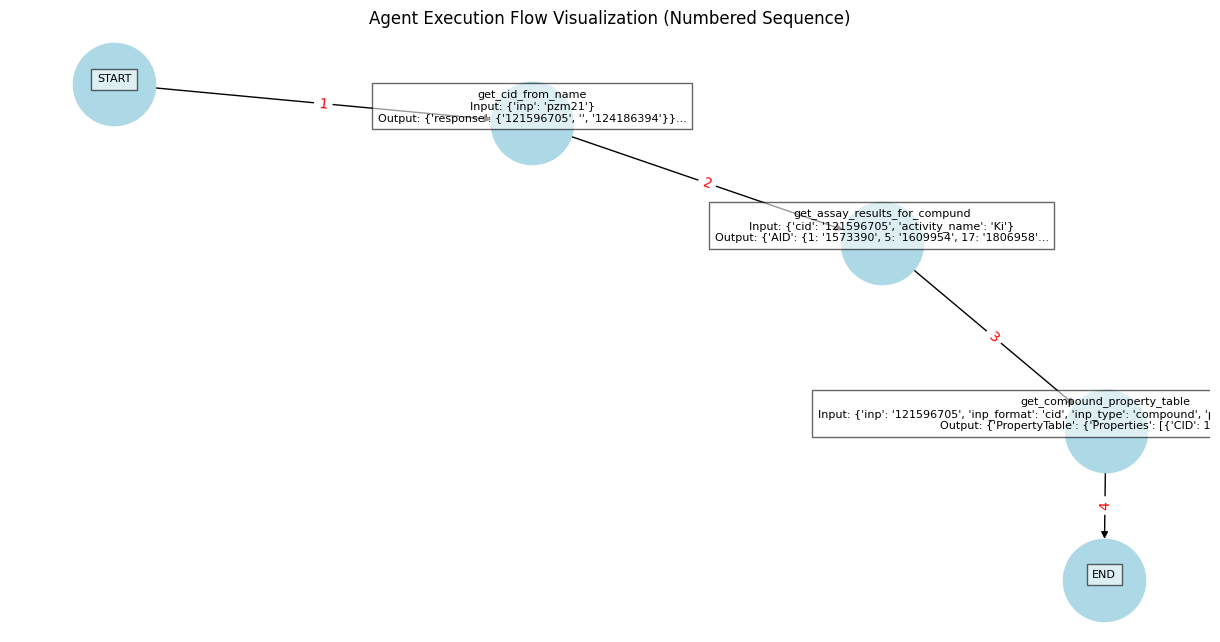

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_execution_flow(intermediate_steps):
    """
    Visualizes the execution flow of an agent's steps.
    
    Parameters:
    - intermediate_steps: List of tuples containing agent actions and responses.
    """
    
    # Create a directed graph
    G = nx.DiGraph()

    # Add start and end nodes
    G.add_node("START")
    G.add_node("END")

    # Process intermediate steps and add nodes/edges
    previous_node = "START"
    node_labels = {"START": "START", "END": "END"}  # Ensure START and END are labeled
    edge_labels = {}  # Store edge sequence numbers

    for step_number, step in enumerate(intermediate_steps, start=1):
        action = step[0].tool
        input_data = step[0].tool_input
        output_data = step[1]

        # Create node label with truncated output
        node_label = f"{action}\nInput: {input_data}\nOutput: {output_data[:50]}..."
        G.add_node(action)
        node_labels[action] = node_label  # Store for later custom labeling

        # Add edge with sequence number
        G.add_edge(previous_node, action)
        edge_labels[(previous_node, action)] = str(step_number)  # Numbering the edges
        previous_node = action

    # Connect last node to END
    G.add_edge(previous_node, "END")
    edge_labels[(previous_node, "END")] = str(len(intermediate_steps) + 1)  # Last step

    # Draw the graph
    plt.figure(figsize=(12, 6))
    pos = nx.spring_layout(G, seed=42)  # Positioning of nodes
    nx.draw(G, pos, labels={node: "" for node in G.nodes}, with_labels=True, 
            node_size=3500, node_color="lightblue", edge_color="black", 
            font_size=10, font_weight="bold", arrows=True)

    # Add custom detailed labels outside the nodes
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, verticalalignment='bottom', 
                            horizontalalignment='center', bbox=dict(facecolor="white", alpha=0.6))

    # Add edge labels to show execution sequence
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")

    # Display the graph
    plt.title("Agent Execution Flow Visualization (Numbered Sequence)")
    plt.show()

visualize_execution_flow(result['intermediate_steps'])

In [ ]:
from graphviz import Digraph

# Create a Graphviz Digraph
dot = Digraph(format="png")

# Add Start Node
dot.node("Start", "Start", shape="ellipse", style="filled", fillcolor="lightblue")

prev_node = "Start"

# Add Intermediate Steps as Table-Like Nodes
for i, step in enumerate(result["intermediate_steps"]):
    action = step[0]  # AgentAction object
    output = step[1]  # Tool output

    # Table-like node
    node_label = f"""
    <<TABLE BORDER="1" CELLBORDER="1" CELLSPACING="0">
        <TR><TD><B>Tool:</B> {action.tool}</TD></TR>
        <TR><TD><B>Input:</B> {action.tool_input}</TD></TR>
        <TR><TD><B>Output:</B> {output}</TD></TR>
    </TABLE>>
    """
    
    node_id = f"Step {i+1}"
    dot.node(node_id, label=node_label, shape="plaintext")
    dot.edge(prev_node, node_id)

    prev_node = node_id  # Update last node

# Add Stop Node
dot.node("Stop", "Stop", shape="ellipse", style="filled", fillcolor="lightblue")
dot.edge(prev_node, "Stop")

# Save & Render
dot.render("execution_graph", view=True)  # This will open the image

'execution_graph.png'

START /usr/bin/eog "execution_graph.png"



(eog:50781): Gtk-WARNING **: 17:05:32.780: cannot open display: 


In [47]:
import json

# Convert intermediate steps to JSON format
intermediate_steps = result.get("intermediate_steps", [])

# Create a list of nodes and edges
nodes = [{"id": "Start", "group": 1}]
edges = []

prev_node = "Start"

# Loop through intermediate steps
for i, step in enumerate(intermediate_steps):
    action = step[0]  # AgentAction object
    output = step[1]  # Tool output

    # Create a node for this step
    node_id = f"Step {i+1}"
    nodes.append({"id": node_id, "group": 2, "tool": action.tool, "input": action.tool_input, "output": output})

    # Create an edge from the previous node
    edges.append({"source": prev_node, "target": node_id})

    prev_node = node_id  # Update last node

# Add Stop Node
nodes.append({"id": "Stop", "group": 1})
edges.append({"source": prev_node, "target": "Stop"})

# Save as JSON
graph_data = {"nodes": nodes, "links": edges}
json_data = json.dumps(graph_data)

In [51]:
json_data

'{"nodes": [{"id": "Start", "group": 1}, {"id": "Step 1", "group": 2, "tool": "get_compound_property_table", "input": {"inp": "water", "inp_format": "name", "inp_type": "compound", "property_list": "MolecularWeight"}, "output": "{\'PropertyTable\': {\'Properties\': [{\'CID\': 962, \'MolecularWeight\': \'18.015\'}]}}"}, {"id": "Stop", "group": 1}], "links": [{"source": "Start", "target": "Step 1"}, {"source": "Step 1", "target": "Stop"}]}'

In [53]:
from IPython.core.display import display, HTML
import json

# Ensure JSON is formatted correctly
json_data = json.dumps(graph_data, indent=4)  # Pretty-print JSON for readability

html_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <script src="https://cdnjs.cloudflare.com/ajax/libs/d3/6.7.0/d3.min.js"></script>
    <style>
        body {{
            font-family: Arial, sans-serif;
        }}
        .link {{
            stroke: #999;
            stroke-opacity: 0.6;
        }}
        .node text {{
            font-size: 12px;
            pointer-events: none;
            fill: black;
        }}
        .node rect {{
            fill: lightblue;
            stroke: black;
            stroke-width: 1px;
            rx: 5px;
        }}
    </style>
</head>
<body>
    <h3>Interactive Execution Graph (D3.js)</h3>
    <svg width="800" height="600" style="border: 1px solid black;"></svg>
    <script>
        console.log("Loading graph data...");
        var graph = {json_data};  // Check if JSON loads correctly
        console.log(graph);

        var width = 800, height = 600;

        var svg = d3.select("svg"),
            simulation = d3.forceSimulation()
                .force("link", d3.forceLink().id(d => d.id).distance(150))
                .force("charge", d3.forceManyBody().strength(-200))
                .force("center", d3.forceCenter(width / 2, height / 2));

        var link = svg.append("g")
            .attr("class", "links")
            .selectAll("line")
            .data(graph.links)
            .enter().append("line")
            .attr("class", "link")
            .attr("stroke", "#666")
            .attr("stroke-width", 2);

        var node = svg.append("g")
            .attr("class", "nodes")
            .selectAll("g")
            .data(graph.nodes)
            .enter().append("g");

        node.append("rect")
            .attr("width", 160)
            .attr("height", 80)
            .attr("x", -80)
            .attr("y", -40)
            .attr("fill", d => d.id === "Start" || d.id === "Stop" ? "orange" : "lightblue");

        node.append("text")
            .attr("dy", "-20")
            .attr("text-anchor", "middle")
            .text(d => d.id);

        node.append("text")
            .attr("dy", "-5")
            .attr("text-anchor", "middle")
            .text(d => d.tool ? "Tool: " + d.tool : "");

        node.append("text")
            .attr("dy", "10")
            .attr("text-anchor", "middle")
            .text(d => d.input ? "Input: " + JSON.stringify(d.input) : "");

        node.append("text")
            .attr("dy", "25")
            .attr("text-anchor", "middle")
            .text(d => d.output ? "Output: " + JSON.stringify(d.output) : "");

        node.call(d3.drag()
            .on("start", dragstarted)
            .on("drag", dragged)
            .on("end", dragended));

        simulation
            .nodes(graph.nodes)
            .on("tick", ticked);

        simulation.force("link")
            .links(graph.links)
            .id(d => d.id); // Ensure correct linking

        function ticked() {{
            link
                .attr("x1", d => d.source.x)
                .attr("y1", d => d.source.y)
                .attr("x2", d => d.target.x)
                .attr("y2", d => d.target.y);

            node
                .attr("transform", d => "translate(" + d.x + "," + d.y + ")");
        }}

        function dragstarted(event, d) {{
            if (!event.active) simulation.alphaTarget(0.3).restart();
            d.fx = d.x;
            d.fy = d.y;
        }}

        function dragged(event, d) {{
            d.fx = event.x;
            d.fy = event.y;
        }}

        function dragended(event, d) {{
            if (!event.active) simulation.alphaTarget(0);
            d.fx = null;
            d.fy = null;
        }}
    </script>
</body>
</html>
"""

# Display in Jupyter Notebook
display(HTML(html_code))

/tmp/ipykernel_39371/3891414235.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [54]:
with open("./test_d3_graph.html", "w") as f:
    f.write(html_code)

In [15]:
from typing import TypedDict, Annotated, Union
from langchain_core.agents import AgentAction, AgentFinish
from langchain_core.messages import BaseMessage
import operator


class AgentState(TypedDict):
    # The input string
    input: str
    # The list of previous messages in the conversation
    chat_history: list[BaseMessage]
    # The outcome of a given call to the agent
    # Needs `None` as a valid type, since this is what this will start as
    agent_outcome: Union[AgentAction, AgentFinish, None]
    # List of actions and corresponding observations
    # Here we annotate this with `operator.add` to indicate that operations to
    # this state should be ADDED to the existing values (not overwrite it)
    intermediate_steps: Annotated[list[tuple[AgentAction, str]], operator.add]
    execution_history: Annotated[list[dict], operator.add]  # New field for tracking steps

In [16]:
# Define the agent
from langchain_core.agents import AgentActionMessageLog

def run_agent(data):
    inputs = data.copy()
    text = inputs['input']
    agent_outcome = pubchem_driver_based_agent.invoke({"input": text})

    # Track execution steps
    if "execution_history" not in data:
        data["execution_history"] = []  # Initialize if not present

    data["execution_history"].append({
        "step": len(data["execution_history"]) + 1,
        "node": "agent",
        "action": "Agent Decision",
        "output": agent_outcome.get("output", None),
        "intermediate_steps": agent_outcome.get("intermediate_steps", [])
    })

    return {"agent_outcome": agent_outcome, "execution_history": data["execution_history"]}

# Define the function to execute tools
def execute_tools(data):
    # Get the most recent agent_outcome - this is the key added in the `agent` above
    agent_output = data["agent_outcome"]
    if len(agent_output['intermediate_steps'])>=1 :
        agent_action = agent_output['intermediate_steps'][0][0]
        output = tool_executor.invoke(agent_action)
        return {"intermediate_steps": [(agent_action, str(output))]}
    else:
        return {"intermediate_steps":[]}

# Define logic that is used to determine which conditional edge to go down
def should_continue(data):
    # If the agent outcome is an AgentFinish, then we return `exit` string
    # This will be used when setting up the graph to define the flow
    if data["agent_outcome"]["output"] is not None:
        print(" **AgentFinish** " )
        return "end"
    # Otherwise, an AgentAction is returned
    # Here we return `continue` string
    # This will be used when setting up the graph to define the flow
    else:
        print(" **continue** " )
        return "continue"

In [17]:
from langgraph.graph import END, StateGraph

# Define a new graph
workflow = StateGraph(AgentState)

# Define the two nodes we will cycle between
workflow.add_node("agent", run_agent)
workflow.add_node("action", execute_tools)

# Set the entrypoint as `agent`
# This means that this node is the first one called
workflow.set_entry_point("agent")

# We now add a conditional edge
workflow.add_conditional_edges(
    # First, we define the start node. We use `agent`.
    # This means these are the edges taken after the `agent` node is called.
    "agent",
    # Next, we pass in the function that will determine which node is called next.
    should_continue,
    # Finally we pass in a mapping.
    # The keys are strings, and the values are other nodes.
    # END is a special node marking that the graph should finish.
    # What will happen is we will call `should_continue`, and then the output of that
    # will be matched against the keys in this mapping.
    # Based on which one it matches, that node will then be called.
    {
        # If `tools`, then we call the tool node.
        "continue": "action",
        # Otherwise we finish.
        "end": END,
    },
)

# We now add a normal edge from `tools` to `agent`.
# This means that after `tools` is called, `agent` node is called next.
workflow.add_edge("action", "agent")

# Finally, we compile it!
# This compiles it into a LangChain Runnable,
# meaning you can use it as you would any other runnable
app = workflow.compile()

In [18]:
## first let's see if we can trigger our custom retriever tool named : AboutSweden

inputs = {"input": "What is the Ki of pzm21 to the Mu opioid receptor, cite a specific assay in your response?"}
outputs = app.invoke(inputs)



> Entering new AgentExecutor chain...
To find the Ki of PZM21 to the Mu opioid receptor, I will need to retrieve the assay results for PZM21 and look for an assay related to the Mu opioid receptor with Ki as the activity type. Let's start by finding the Compound ID (CID) for PZM21.

Action:
```json
{
    "action": "get_cid_from_name",
    "action_input": {"inp": "PZM21"}
}
```{'response': {'121596705', '', '124186394'}}```json
{
    "action": "get_assay_results_for_compund",
    "action_input": {"cid": "121596705", "activity_name": "Ki"}
}
```{'AID': {1: '1573390', 5: '1609954', 17: '1806958', 18: '1806958', 19: '1806958', 20: '1806958'}, 'Panel Member ID': {1: '', 5: '', 17: '', 18: '', 19: '', 20: ''}, 'SID': {1: '440143506', 5: '440143506', 17: '440726618', 18: '440726618', 19: '440726618', 20: '440726618'}, 'CID': {1: '121596705', 5: '121596705', 17: '121596705', 18: '121596705', 19: '121596705', 20: '121596705'}, 'Activity Outcome': {1: 'Active', 5: 'Active', 17: 'Active', 18: '

In [19]:
# Initialize state with execution history tracking
initial_state = AgentState(
    input="What is the Ki of pzm21 to the Mu opioid receptor, cite a specific assay in your response?",
    chat_history=[],
    agent_outcome=None,
    intermediate_steps=[],
    execution_history=[]
)

# Execute workflow
final_state = app.invoke(initial_state)

# Print execution history
import json
print(json.dumps(final_state["execution_history"], indent=4))



> Entering new AgentExecutor chain...
To find the Ki of PZM21 to the Mu opioid receptor and cite a specific assay, I need to perform the following steps:

1. Get the CID for PZM21.
2. Retrieve assay results for the compound represented by this CID that are related to the Mu opioid receptor.
3. Find an assay with a Ki value for the Mu opioid receptor.

Let's start by finding the CID for PZM21.

Action:
```json
{
    "action": "get_cid_from_name",
    "action_input": {"inp": "PZM21"}
}
```{'response': {'121596705', '', '124186394'}}{
    "action": "get_assay_results_for_compund",
    "action_input": {"cid": "121596705"}
}{'AID': {1: '1573390', 5: '1609954', 17: '1806958', 18: '1806958', 19: '1806958', 20: '1806958'}, 'Panel Member ID': {1: '', 5: '', 17: '', 18: '', 19: '', 20: ''}, 'SID': {1: '440143506', 5: '440143506', 17: '440726618', 18: '440726618', 19: '440726618', 20: '440726618'}, 'CID': {1: '121596705', 5: '121596705', 17: '121596705', 18: '121596705', 19: '121596705', 20: '1